In this notebook we will be completing a time series analysis on the four years worth of trip data form the cleaned dataset and then create a prediction model using an Auto-Regressive, Integrated, Moving Average (ARIMA) Model and then evaluating the model by taking the Root Mean Square Error (RMSE).

Please load the environment created specifically for this capstone project before moving ahead.

Resources that I had consulted regarding various code used in the notebook are as follows:

https://stackoverflow.com/<br>
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/<br>
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/<br>

Other links would be referenced later on in the notebook as well.

In [154]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

# matplotlib style & parameter changes
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (16, 7)

# time series analysis
from statsmodels.api import tsa

# Timer
from tqdm import tqdm
import time

## Table of Contents
[Data Dictionary](#Data-Dictionary)<br>

[Feature Engineering](#Feature-Engineering)<br>

[Data Wrangling](#Data-Wrangling)<br>

## Data Dictionary

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage
- `Bike Id`: Unique ID for the individual bike used
- `Start Time`: Trip start time
- `Start Station Id`: Unique ID code for the start station
- `Start Station Name`: Name of the start station
- `Start Station Latitude`: Latitude coordinates ofthe  start station
- `Start Station Longitude`: Longitude coordinates of the start station
- `Start Station Elevation`: Elevation in meters for the start station
- `Start Station Capacity`: Bike dock capacity for the start station
- `Start Station Accepts Credit Card`: Binary classifier for whether the station accepts credit card payments
- `Start Station FSA`: Forward Sortation Area for where the start station is located
- `End Time`: Trip end time.
- `End Station Id`: Unique ID code for the end station.
- `End Station Name`: Name of the end station.
- `End Station Latitude`: Latitude coordinates of the end station
- `End Station Longitude`: Longitude coordinates of the end station
- `End Station Elevation`: Elevation in meters for the end station
- `End Station Capacity`: Bike dock capacity for the end station
- `End Station Accepts Credit Card`: Binary classifier for whether the end station accepts credit card payments
- `End Station FSA`: Forward Sortation Area for where the end station is located
- `Trip Duration Minutes`: Duration of the trip in minutes.
- `Is Member`: Binary classifier for whether the user is an annual member
- `Temp (°C)`: Temperature in Celsius at the start of the trip
- `Rel Hum (%)`: Relative Humdity at the start of the trip
- `Wind Spd (km/h)`: Wind speed in km/h at the start of the trip

## Data Cleaning

In [2]:
# Load Dataset
df = pd.read_csv('data/master_df.csv')

In [3]:
# View Dataset
df.head()

,Unnamed: 0,Trip Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Accepts Credit Card,...,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,End Station FSA,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
0,0,712382,2017-01-01 00:00:00,7051,Wellesley St E / Yonge St Green P,43.654879,-79.375091,90.0,19.0,1.0,...,-79.379903,118.0,19.0,1.0,M5B,4,1,1.5,69.0,39.0
1,1,712383,2017-01-01 00:00:00,7143,Kendal Ave / Bernard Ave,43.671513,-79.408317,120.0,15.0,1.0,...,-79.411667,118.0,23.0,1.0,M5R,5,1,1.5,69.0,39.0
2,2,712384,2017-01-01 00:05:00,7113,Parliament St / Aberdeen Ave,43.665278,-79.368333,103.0,15.0,1.0,...,-79.409167,108.0,19.0,1.0,M6G,23,1,1.5,69.0,39.0
3,3,712385,2017-01-01 00:07:00,7077,College Park South,43.659777,-79.382767,107.0,19.0,1.0,...,-79.395003,88.0,19.0,1.0,M5V,14,1,1.5,69.0,39.0
4,4,712386,2017-01-01 00:08:00,7079,McGill St / Church St,43.660694,-79.379052,104.0,19.0,1.0,...,-79.389165,106.0,25.0,1.0,M5G,5,1,1.5,69.0,39.0


In [4]:
# Drop duplicate index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Check for null values
print(f'Total Number of Null values:\n\n{df.isna().sum()}')
print('\n----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{df.isna().mean()*100}')

Total Number of Null values:

Trip Id                              0
Start Time                           0
Start Station Id                     0
Start Station Name                   0
Start Station Latitude               0
Start Station Longitude              0
Start Station Elevation              0
Start Station Capacity               0
Start Station Accepts Credit Card    0
Start Station FSA                    0
End Time                             0
End Station Id                       0
End Station Name                     0
End Station Latitude                 0
End Station Longitude                0
End Station Elevation                0
End Station Capacity                 0
End Station Accepts Credit Card      0
End Station FSA                      0
Trip Duration Minutes                0
Is Member                            0
Temp (°C)                            0
Rel Hum (%)                          0
Wind Spd (km/h)                      0
dtype: int64

--------------------

In [6]:
# Datatype check
df.dtypes

Trip Id                                int64
Start Time                            object
Start Station Id                       int64
Start Station Name                    object
Start Station Latitude               float64
Start Station Longitude              float64
Start Station Elevation              float64
Start Station Capacity               float64
Start Station Accepts Credit Card    float64
Start Station FSA                     object
End Time                              object
End Station Id                         int64
End Station Name                      object
End Station Latitude                 float64
End Station Longitude                float64
End Station Elevation                float64
End Station Capacity                 float64
End Station Accepts Credit Card      float64
End Station FSA                       object
Trip Duration Minutes                  int64
Is Member                              int64
Temp (°C)                            float64
Rel Hum (%

- `Capacity`, `Accepts Credit Card` for Start and End Station can be changed from float64 to int64
- `Start Time` and `End Time` need to be converted from object to datetime

In [7]:
# Change dtypes
df['Start Station Capacity'] = df['Start Station Capacity'].astype(int)
df['Start Station Accepts Credit Card'] = df['Start Station Accepts Credit Card'].astype(int)
df['End Station Capacity'] = df['End Station Capacity'].astype(int)
df['End Station Accepts Credit Card'] = df['End Station Accepts Credit Card'].astype(int)
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

In [8]:
# Final datatype check
df.dtypes

Trip Id                                       int64
Start Time                           datetime64[ns]
Start Station Id                              int64
Start Station Name                           object
Start Station Latitude                      float64
Start Station Longitude                     float64
Start Station Elevation                     float64
Start Station Capacity                        int64
Start Station Accepts Credit Card             int64
Start Station FSA                            object
End Time                             datetime64[ns]
End Station Id                                int64
End Station Name                             object
End Station Latitude                        float64
End Station Longitude                       float64
End Station Elevation                       float64
End Station Capacity                          int64
End Station Accepts Credit Card               int64
End Station FSA                              object
Trip Duratio

## Time Series Analysis

Back to [Table of Contents](#Table-of-Contents).<br>

Because we are completing a time series analysis on this dataset, there are only 2 features that I am interested in, which are Start Time and Aggregated Trip Count. So I will be creating two different datasets from using my main dataframe:

1. Aggregated Daily Trips dataset
2. Aggregated Hourly Trips dataset

In [19]:
# Saving all trips `Start Time` to a temp series
t_series = pd.to_datetime(df['Start Time'])

# Creating dataframe and groupby day with count of trips
dailytrips_df = t_series.groupby(t_series.dt.floor('d')).size().reset_index(name='Trip Count')

# Set index
dailytrips_df.set_index('Start Time', inplace=True)

# Check
dailytrips_df.head()

,Trip Count
Start Time,
2017-01-01,487
2017-01-02,1632
2017-01-03,2013
2017-01-04,1442
2017-01-05,1411


In [20]:
# Saving all trips `Start Time` to a temp series
t_series = pd.to_datetime(df['Start Time'])

# Creating dataframe and groupby hour with count of trips
hourlytrips_df = t_series.groupby(t_series.dt.floor('H')).size().reset_index(name='Trip Count')

# Set
hourlytrips_df.set_index('Start Time', inplace=True)

# Check
hourlytrips_df.head()

,Trip Count
Start Time,
2017-01-01 00:00:00,19
2017-01-01 01:00:00,14
2017-01-01 02:00:00,10
2017-01-01 03:00:00,15
2017-01-01 04:00:00,18


Next lets visualize our time series data using plotly as their graph has an intuitive interactive component we can build in.

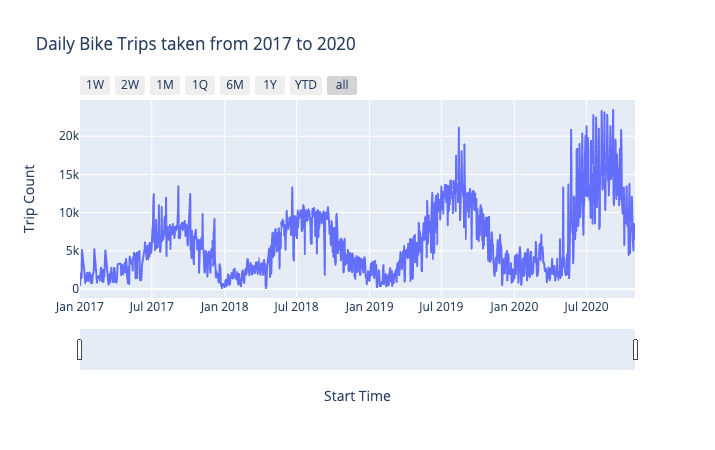

In [167]:
import plotly.express as px

fig = px.line(dailytrips_df, x=dailytrips_df.index, y='Trip Count', title='Daily Bike Trips taken from 2017 to 2020')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1W", step="day", stepmode="backward"),
            dict(count=14, label="2W", step="day", stepmode="backward"),
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=3, label="1Q", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

fig.show()
fig.write_html('data/timeseries_trips.html')

There appears to be high variability in trip usage this year compared to years prior where there was only a brief weekend spike in August of 2019 compared to this year where every weekend saw large spikes in usage.

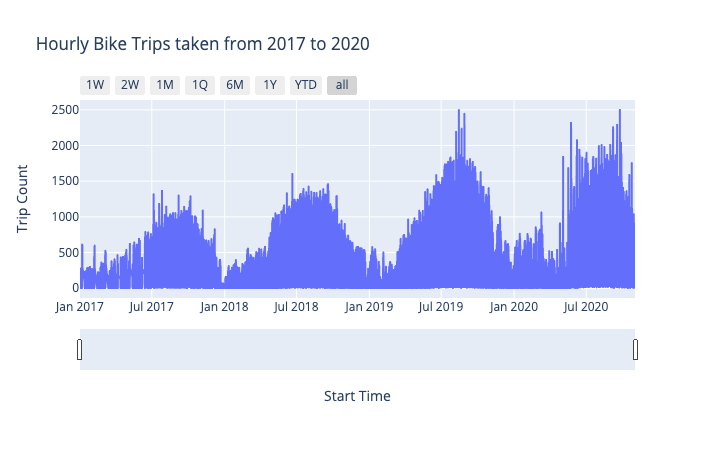

In [166]:
fig = px.line(hourlytrips_df, x=hourlytrips_df.index, y='Trip Count', title='Hourly Bike Trips taken from 2017 to 2020')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1W", step="day", stepmode="backward"),
            dict(count=14, label="2W", step="day", stepmode="backward"),
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=3, label="1Q", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
# fig.write_html('data/timeseries_trips.html')
fig.show()

Zoomed out this appears more like a bar chart than a line chart because this graph shows the hourly seasonality of trips taken in the 4 years of the data. Hourly usage appears to drop near zero everyday between the hours of 12-5 AM. Indicating this is the most ideal time to perform maintance on the network and bikes.

In [160]:
# Sets graph scale for readability based on context, settings include `notebook`,
# `paper`, `talk`, & `poster`
sns.set_context('notebook')

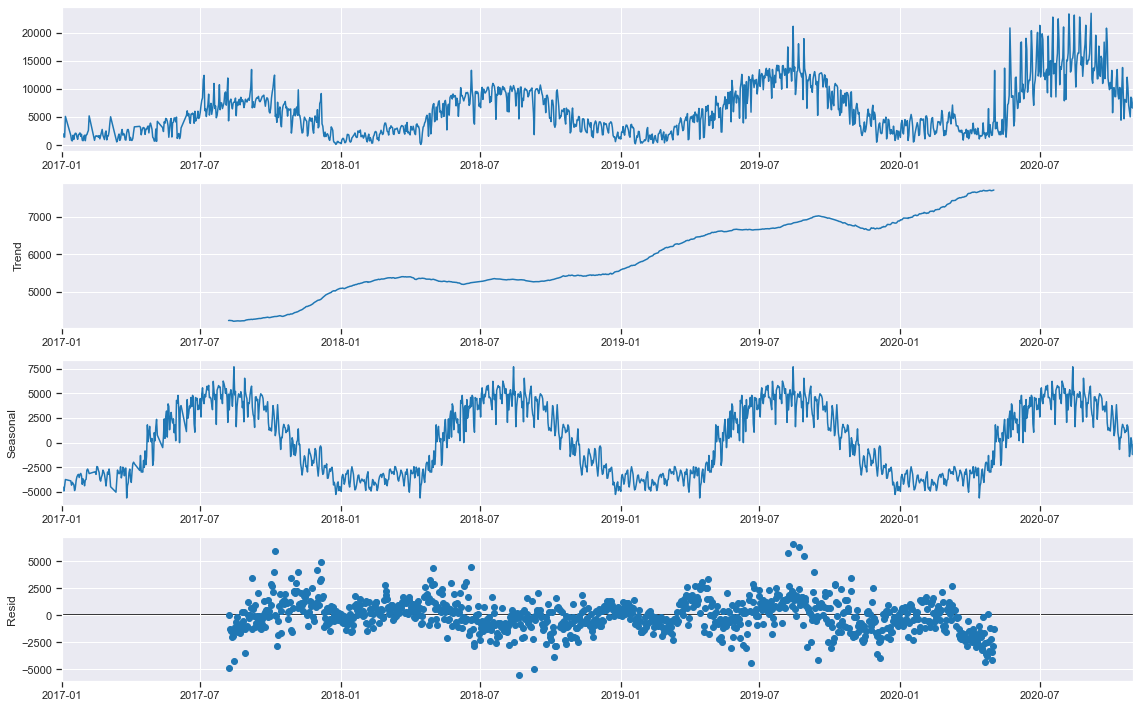

In [161]:
# Plot decomposition using base statsmodel seasonal decomposition algorithm
matplotlib.rcParams['figure.figsize'] = (16, 10)
decomposition = tsa.seasonal_decompose(dailytrips_df, model='additive', period=365)
decomposition.plot()
# plt.savefig('data/seasonal_decompose.png')
plt.show()

We can see that there is still some seasonality in the trend line that this algorithm was not able to capture and there may be some seasonality that was left over in the residuals as well.

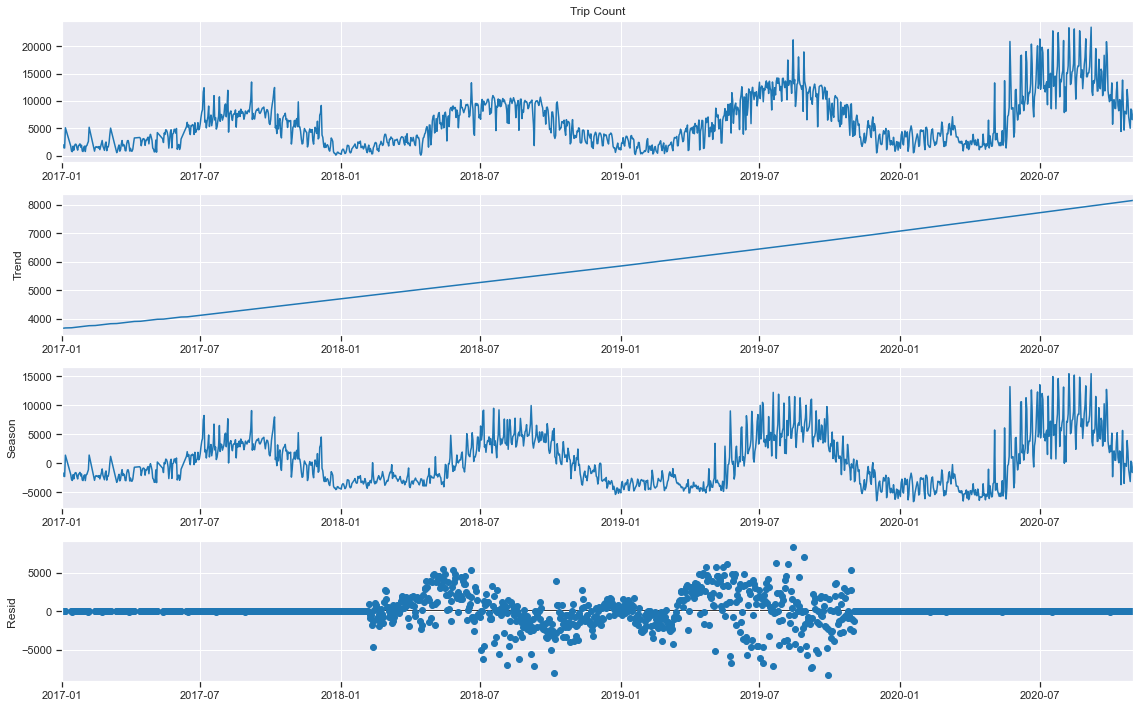

In [162]:
from statsmodels.tsa.seasonal import STL
# Plot decomposition using seasonal trend decomposition with loess algorithm
decomposition2 = STL(dailytrips_df['Trip Count'], period=365, robust=True).fit()
decomposition2.plot()
# plt.savefig('data/stl_decompose.png')
plt.show()

Here we see that using a different algorithm called Seasonal-Trend Decomposition using Locally Estimated Scatterplot Smoothing, we were able to get a clear trend line out of our dataset and this algorithm has the added advantage of being able to have variability in the seasonal decomp. While the residual looks a bit more noisy than the previous algorithm, you can still see some clustering happening in the early 2019 that we were not able to extract.

Lets move on to creating a prediction model for our dataset.

## Time Series Prediction Modelling

In [209]:
# Split into train and test sets 80-20 as I want to see how well the predictive model
# would perform with this year's data and high variability.
X = dailytrips_df
# Split size
size = int(len(X) * 0.775)
train, test = X[0:size], X[size:len(X)]

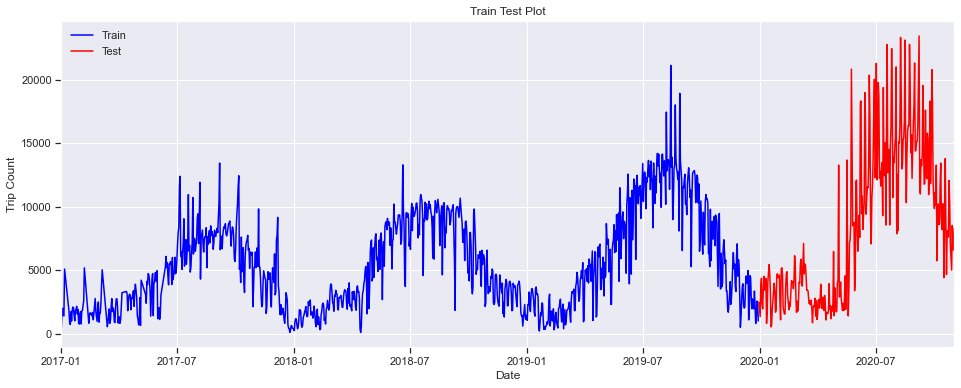

In [210]:
plt.figure(figsize=(16,6))
plt.plot(train.index, train.values, c="blue", label="Train")
plt.plot(test.index, test.values, c="red", label="Test")
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Train Test Plot')
plt.ylabel('Trip Count')
plt.xlabel('Date')
plt.legend()
plt.show();

Now that we have our split. Lets run the model with a baseline of 1 lag, integrate with 1  moving average process order of 1.take a difference of consecutive observations to create an integrated dataset.

Following code for walk-forward validation was referenced from this [link](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) at MachineLearningMastery.com.

In [213]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create list for historic values and prediction values
history = [x for x in train.values]
predictions = []

# Walk-forward validation loop
for t in range(len(test)):
    # Instantiate model
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(1, 0, 0, 12))
    # Fit model
    model_fit = model.fit()
    # Predict
    output = model_fit.forecast()
    # Save values to list
    yhat = output[0]
    predictions.append(yhat)
    obs = test.values[t]
    history.append(obs)
    print(f'predicted= {yhat}, expected={obs}')

predicted= 1828.2778627216749, expected=[2486]
predicted= 2342.8031184981774, expected=[1932]
predicted= 2122.339365343818, expected=[1353]
predicted= 1852.592807656468, expected=[3748]
predicted= 2802.8382241350423, expected=[4377]
predicted= 3196.8789269241897, expected=[2385]
predicted= 2519.1485336699275, expected=[1969]
predicted= 2328.743649431224, expected=[3659]
predicted= 2994.3245255056127, expected=[4528]
predicted= 3449.9435702726564, expected=[3441]
predicted= 3139.128862297601, expected=[3527]
predicted= 3227.071821637697, expected=[4354]
predicted= 3608.8923897711047, expected=[819]
predicted= 2214.7121610338954, expected=[1742]
predicted= 2416.5148517037655, expected=[4102]
predicted= 3306.143469933909, expected=[4782]
predicted= 3708.5046640302426, expected=[5452]
predicted= 4158.899012611289, expected=[4716]
predicted= 4023.847918083873, expected=[3329]
predicted= 3515.5759835203316, expected=[541]
predicted= 2292.048739723992, expected=[717]
predicted= 2131.655578678

In [214]:
# Evaluate Forecast using Root-mean-square Error
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse}')

Test RMSE: 3002.2323952308043


using the Root-Mean-Square Error, we can evaluate the difference between the true and predicted values in our model by looking at the sum of the squared differences then square rooting the sum. Basic rule of thumb is that the lower the RMSE value the better fitted the model is.

Now that we have a base model with a RMSE of 3002, we can do some hyper parameter tuning to see if we can lower this value more.

But first lets plot the Test and Prediction to visualize how well the model predicted the trip count for 2020.

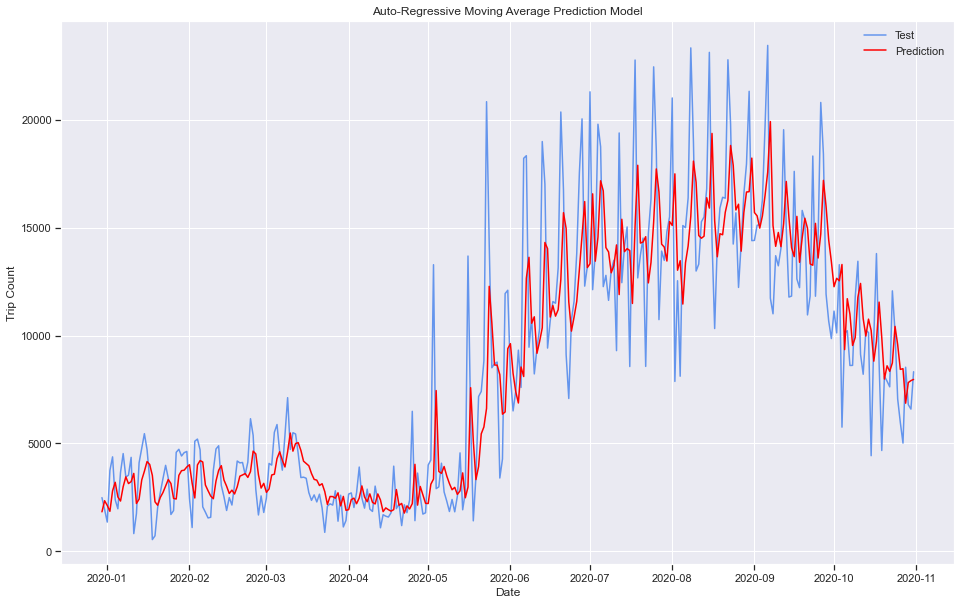

In [215]:
# Plot forecasts against test set
plt.figure(figsize=(16,10))
plt.plot(test.index, test.values, c='cornflowerblue', label='Test')
plt.plot(test.index, predictions, c='red', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.title('Auto-Regressive Moving Average Prediction Model')
plt.legend()
# plt.savefig('data/ARMA_model.png')
plt.show()

As you can see from the chart, the model reactively adjusts its predictions rather than proactively predicts the next day's value based on previous trip counts. This is by no means effective enough for real world use just yet. Lets see if we can solve this issue with some hyperparameter tuning.

We will first take a look at a the autocorrelation plot of our dataset to see how many lags are optimal for our model.

Autocorrelation looks at how the elements of a time series are positively or negatively correlated are to each other. Meaning we are looking at the correlation between the current time series elements compared to corresponding elements that were observed in an earlier period or lag.

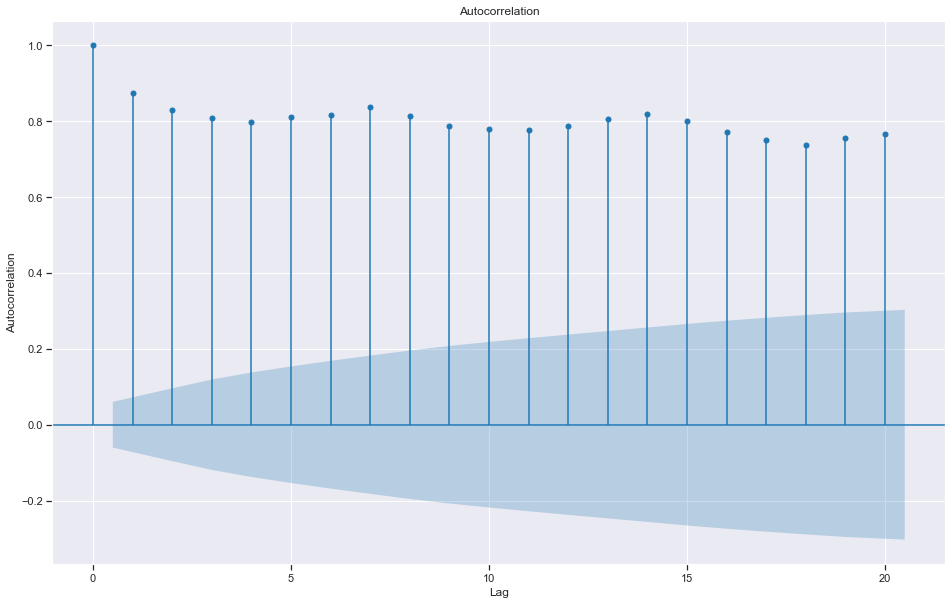

In [211]:
from statsmodels.graphics.tsaplots import plot_acf
#Plot Autocorrelation Factors
plot_acf(train, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

The autocorrelation values a clear cyclical trend peaking ever 7 lags which makes sense since the dataset also has a weekly cyclical trend. There is also a highest peak with 1 lag as well, therefore I will test the model using both 1 and 7 and see what will yield the better result. 

Before we retune another model lets take a look at the Partial AutoCorrelation PLot as well to see if we can discern any patterns.

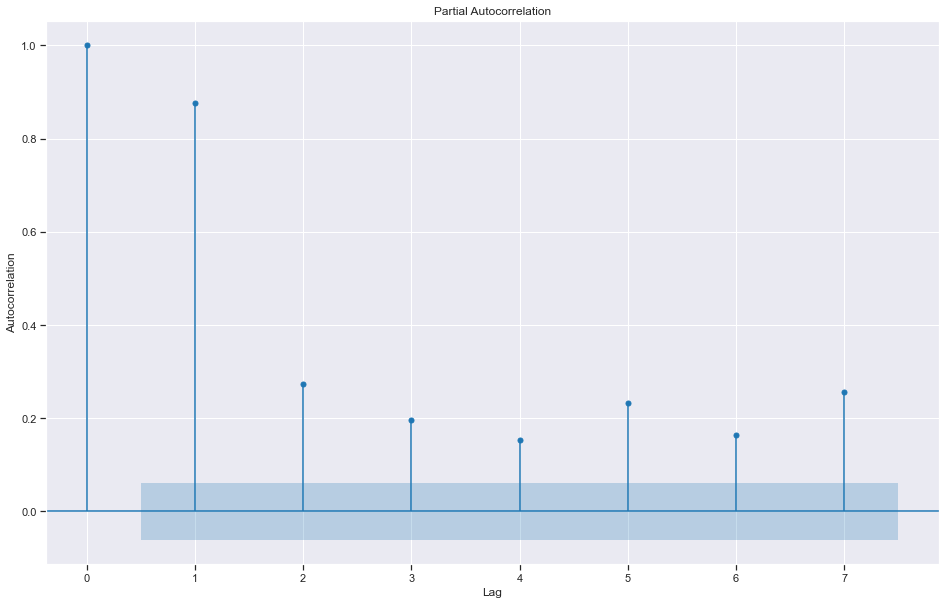

In [212]:
plot_pacf(train, lags=7)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

The PACF shows partial correlation which is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

The PACF above shows that really we only need 1 lag but we can test for 2 as well since it is a distant 2nd in terms of autocorrelation.

In [216]:
# Create list for historic values and prediction values
history2 = [x for x in train.values]
predictions2 = list()

# Walk-forward validation 
for t in range(len(test)):
    # Instantiate model
    model = SARIMAX(history2, order=(2,1,5), trend="t")
    # Fit model
    model_fit2 = model.fit(maxiter=200)
    # Predict
    output = model_fit2.forecast()
    # Save values to list
    yhat = output[0]
    predictions2.append(yhat)
    obs = test.values[t]
    history2.append(obs)
    print(f'predicted= {yhat}, expected={obs}')

predicted= 1749.123314056211, expected=[2486]
predicted= 2219.176908912591, expected=[1932]
predicted= 2041.4994410518364, expected=[1353]
predicted= 1786.580576411463, expected=[3748]
predicted= 2628.200590351356, expected=[4377]
predicted= 3063.6408269239496, expected=[2385]
predicted= 2226.7719266896306, expected=[1969]
predicted= 1999.577786734819, expected=[3659]
predicted= 2737.993760791088, expected=[4528]
predicted= 3220.349829451349, expected=[3441]
predicted= 2774.264968041345, expected=[3527]
predicted= 2842.7748844046096, expected=[4354]
predicted= 3242.72458426758, expected=[819]
predicted= 1885.0441895462868, expected=[1742]
predicted= 2192.9637450947534, expected=[4102]
predicted= 3103.6285223715604, expected=[4782]
predicted= 3674.5297121827134, expected=[5452]
predicted= 3786.215890846969, expected=[4716]
predicted= 3723.2729105879225, expected=[3329]
predicted= 3150.2382168514955, expected=[541]
predicted= 2060.0823251581546, expected=[717]
predicted= 2068.12612723344

/Users/jasonho/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted= 1295.6673135981628, expected=[2155]
predicted= 2048.669740920084, expected=[1789]
predicted= 1507.2537537301314, expected=[2380]
predicted= 2135.5480341536454, expected=[6488]
predicted= 3576.2048345817775, expected=[1418]
predicted= 1804.5859118270964, expected=[3625]
predicted= 2573.594885710623, expected=[2543]
predicted= 2094.448725229989, expected=[1723]


/Users/jasonho/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted= 2178.661887808069, expected=[1784]
predicted= 1656.2898652876179, expected=[3999]
predicted= 3150.2238793511547, expected=[4231]
predicted= 2879.6370882183355, expected=[13285]
predicted= 7405.082813086218, expected=[2903]
predicted= 2777.462068294207, expected=[2985]
predicted= 3431.741227879249, expected=[4082]
predicted= 2964.4199276869076, expected=[2748]
predicted= 4014.141308723564, expected=[2323]
predicted= 2350.665416733241, expected=[1844]
predicted= 3327.9577967065843, expected=[2402]
predicted= 2789.79603298364, expected=[1829]
predicted= 3158.6988823660627, expected=[2556]
predicted= 2664.442667763966, expected=[4561]
predicted= 4131.39754655256, expected=[1923]
predicted= 2566.518170902906, expected=[2752]
predicted= 3286.680304898873, expected=[13687]
predicted= 7427.160020114978, expected=[6101]
predicted= 5238.706088673125, expected=[1410]
predicted= 2975.334974400601, expected=[3457]
predicted= 3777.721327230362, expected=[7174]
predicted= 5695.461849930527

In [217]:
# Evaluate forecasts
rmse2 = sqrt(mean_squared_error(test, predictions2))
print(f'Test RMSE: {rmse2}')

Test RMSE: 2767.3042675420816


Looks like we were successful in improve the RMSE and lowered it by 7.8%. Lets look at the results and if time permits we can tune this model more by adding in a seasonal order parameter to the model.

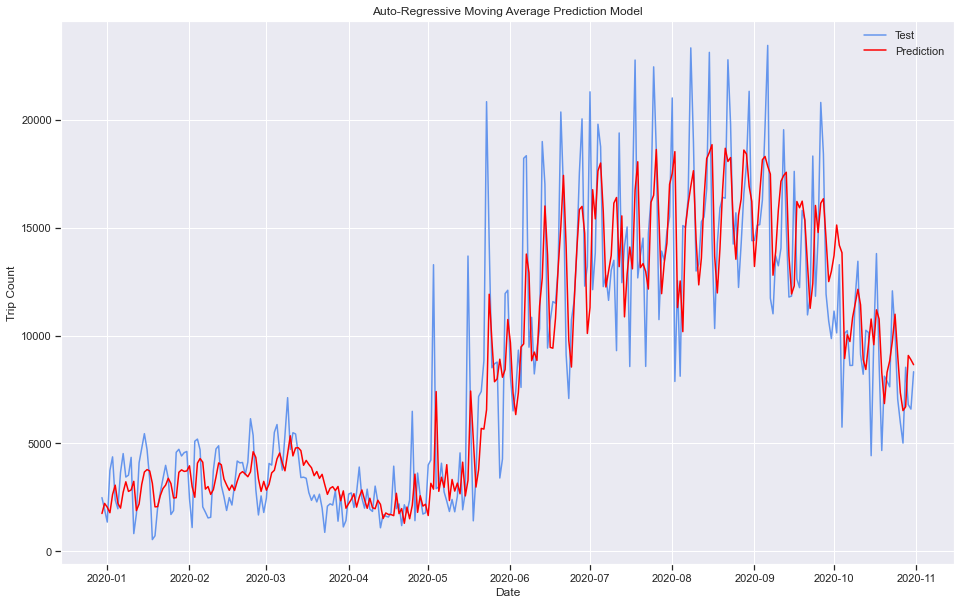

In [218]:
# Plot forecasts against test set
plt.figure(figsize=(16,10))
plt.plot(test.index, test.values, c='cornflowerblue', label='Test')
plt.plot(test.index, predictions2, c='red', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.title('Auto-Regressive Moving Average Prediction Model 2')
plt.legend()
# plt.savefig('data/ARIMA_model2.png')
plt.show()2

In [235]:
# Create list for historic values and prediction values
history3 = [x for x in train.values]
predictions3 = list()
# walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history3, order=(2,1,5), seasonal_order=(1, 0, 0, 12), trend='t')
    model_fit3 = model.fit(maxiter=200)
    output = model_fit3.forecast()
    yhat = output[0]
    predictions3.append(yhat)
    obs = test.values[t]
    history3.append(obs)
    print(f'predicted= {yhat}, expected={obs}')

predicted= 1777.9173354229529, expected=[2486]
predicted= 2241.7134700111574, expected=[1932]
predicted= 2038.2749951999967, expected=[1353]
predicted= 1807.1173191810142, expected=[3748]
predicted= 2646.7774019003905, expected=[4377]
predicted= 3050.101668728841, expected=[2385]
predicted= 2254.5572046377056, expected=[1969]
predicted= 2040.1892506028232, expected=[3659]
predicted= 2752.8148983396654, expected=[4528]
predicted= 3209.379796993963, expected=[3441]
predicted= 2784.885032879607, expected=[3527]
predicted= 2883.104254672853, expected=[4354]
predicted= 3228.7724576325763, expected=[819]
predicted= 1906.2940917104647, expected=[1742]
predicted= 2210.7718637101675, expected=[4102]
predicted= 3050.5968432136033, expected=[4782]
predicted= 3643.799126493949, expected=[5452]
predicted= 3811.355015532198, expected=[4716]
predicted= 3739.4509242432146, expected=[3329]
predicted= 3122.8432487197124, expected=[541]
predicted= 2015.8430943847425, expected=[717]
predicted= 2067.999592

In [236]:
# evaluate forecasts
rmse3 = sqrt(mean_squared_error(test, predictions3))
print(f'Test RMSE: {rmse3}')

Test RMSE: 2747.7956796623143


This model gave us a minor improvement by lowering the RMSE by 0.7% from the previous model with the addition of the seasonal order parameter. Now lets take a look at the chart and model summary.

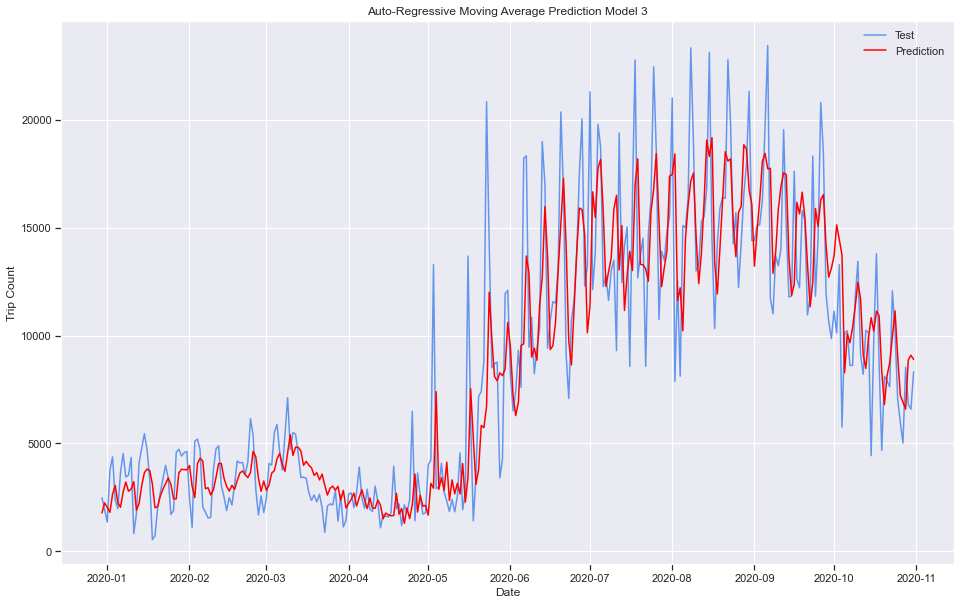

In [237]:
# plot forecasts against actual outcomes
plt.figure(figsize=(16,10))
plt.plot(test.index, test.values, c='cornflowerblue', label='Test')
plt.plot(test.index, predictions3, c='red', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.title('Auto-Regressive Moving Average Prediction Model 3')
plt.legend()
# plt.savefig('data/ARIMA_model3.png')
plt.show() 

In [239]:
# Next 5 day forecast
print (f'Next 5 Trip Count forecast: {model_fit3.forecast(5)}')

Next 5 Trip Count forecast: [8894.9286173  7778.48450929 6291.61892265 5856.48191165 6229.01734388]


## Summary & Next Steps

While this model is still a working progress, I can see that with a few minor parameter tweaking I was able get a more accurate model forecast. Which can aide in business planning to anticipate next day usage and reshuffle the bike distribution across stations that are expected higher usage.

My next steps will be to find a way to better tune the hyperparameters and look into other time series models as well as try and get fbprophet working properly on my machine.